In [59]:
import requests,iris,sys
import matplotlib.pyplot as plt
import iris.plot as iplt
import pandas as pd
sys.path.append("/Users/jago/Downloads/iris-grib-0.15.1")

Need to install:
- brew install eccodes (dependance for https://pypi.org/project/eccodes/, also takes forever)
- pip install eecodes iris iris_grib

God damn meteorolgists just have to make this hard for us

In [62]:
headers = {
    'x-ibm-client-id': "d31a2084-23e1-4f77-be41-7d5e9e88a62f",
    'x-ibm-client-secret': "C4qI1tL5gJ5uN6qX8eJ2cJ2bY7oP5oS6gH2xQ4yB1qI5gO2tM8",
    'accept': "application/x-grib"
    }
#Stupid random altitude values they provide
alts=[5,10,20,30,50,75,100,150,200,250,300,400,500,600,700,800,1000,1250,1500,1750,2000,2250,2500,2750,3000,3250,3500,3750,4000,4500,5000,5500,6000]
order_id="o185505797332"
route="data/wind/forcast/20201208/"

In [57]:
for alt in alts:
    file="agl_v-component-of-wind_%s_+00"%alt
    url="https://api-metoffice.apiconnect.ibmcloud.com/metoffice/production/1.0.0/orders/%s/latest/%s/data"%(order_id,file)
    r=requests.get(url, headers=headers)
    with open("data/wind/forcast/20201208/%s.grib"%file, mode='wb') as localfile:
        localfile.write(r.content)

In [82]:
data={"u":[],"v":[]}
for alt in alts:
    for direc in ["u","v"]:
        file="agl_%s-component-of-wind_%s_+00"%(direc,alt)
        tmp=iris.load_cube("%s%s.grib"%(route,file))
        data[direc].append(tmp.data[0][0][0])

In [85]:
data["u"]

[0.11611473746597767,
 0.11580181308090687,
 0.1228551845997572,
 0.12836802005767822,
 0.15191733837127686,
 0.19641016842797399,
 0.22317428374662995,
 0.23494831111747772,
 0.138870234375,
 -0.35672765225172043,
 -0.5549642257392406,
 -0.6088189780712128,
 -0.7532954216003418,
 -0.5482249893248081,
 -0.509203237015754,
 -0.13478960681823082,
 1.328584912698716,
 1.3322469778358936,
 0.8272908627986908,
 0.9009005501866341,
 0.9900271892547607,
 1.477353274822235,
 1.9377455464564264,
 1.836815383285284,
 0.9775011567398906,
 0.20379491616040468,
 -0.527577503817156,
 -1.1389634013175964,
 -1.4261796604841948,
 -0.4917574115097523,
 0.062041450291872025,
 0.008292794227600098,
 -2.934154123067856]

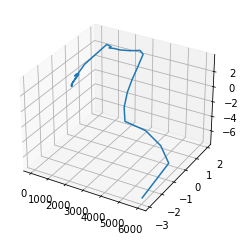

In [95]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(alts,data["u"],data["v"])